In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


# Load the dataset
file_path = "stocks.csv"  # Ensure the file is in the same directory as your notebook
data = pd.read_csv(file_path)

# Display first few rows
print(data.head())

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  07-02-2023  150.639999  155.229996  150.639999  154.649994   
1   AAPL  08-02-2023  153.880005  154.580002  151.169998  151.919998   
2   AAPL  09-02-2023  153.779999  154.330002  150.419998  150.869995   
3   AAPL  10-02-2023  149.460007  151.339996  149.220001  151.009995   
4   AAPL  13-02-2023  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


In [2]:
import pandas as pd

# Load dataset
file_path = "stocks.csv"  # Ensure the file is in the correct directory
data = pd.read_csv(file_path)

# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

# Drop any duplicate rows if present
data = data.drop_duplicates()

# Check for missing values and remove them
data = data.dropna()

# Display dataset info
print(data.info())
print(data.head())  # Check if data loaded correctly


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     248 non-null    object        
 1   Date       248 non-null    datetime64[ns]
 2   Open       248 non-null    float64       
 3   High       248 non-null    float64       
 4   Low        248 non-null    float64       
 5   Close      248 non-null    float64       
 6   Adj Close  248 non-null    float64       
 7   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 15.6+ KB
None
  Ticker       Date        Open        High         Low       Close  \
0   AAPL 2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL 2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL 2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL 2023-02-10  149.460007  151.339996  149.220001

In [3]:
# Check for missing values
print(data.isnull().sum())

# Convert Date column to datetime
# Convert Date column to datetime with correct format
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")


# Drop any duplicate rows if present
data = data.drop_duplicates()

# Display dataset info
print(data.info())


Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     248 non-null    object        
 1   Date       248 non-null    datetime64[ns]
 2   Open       248 non-null    float64       
 3   High       248 non-null    float64       
 4   Low        248 non-null    float64       
 5   Close      248 non-null    float64       
 6   Adj Close  248 non-null    float64       
 7   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 15.6+ KB
None


In [4]:
print("\nDataset Summary:\n", data.describe())


Dataset Summary:
                                 Date        Open        High         Low  \
count                            248  248.000000  248.000000  248.000000   
mean   2023-03-22 22:27:05.806451712  215.252093  217.919662  212.697452   
min              2023-02-07 00:00:00   89.540001   90.129997   88.860001   
25%              2023-03-01 00:00:00  135.235004  137.440004  134.822495   
50%              2023-03-22 12:00:00  208.764999  212.614998  208.184998   
75%              2023-04-14 00:00:00  304.177506  307.565002  295.437500   
max              2023-05-05 00:00:00  372.410004  373.829987  361.739990   
std                              NaN   91.691315   92.863023   90.147881   

            Close   Adj Close        Volume  
count  248.000000  248.000000  2.480000e+02  
mean   215.381674  215.362697  3.208210e+07  
min     89.349998   89.349998  2.657900e+06  
25%    136.347498  136.347498  1.714180e+07  
50%    209.920006  209.920006  2.734000e+07  
75%    303.942505  3

In [5]:
print("\nUnique Tickers:", data['Ticker'].unique())


Unique Tickers: ['AAPL' 'MSFT' 'NFLX' 'GOOG']


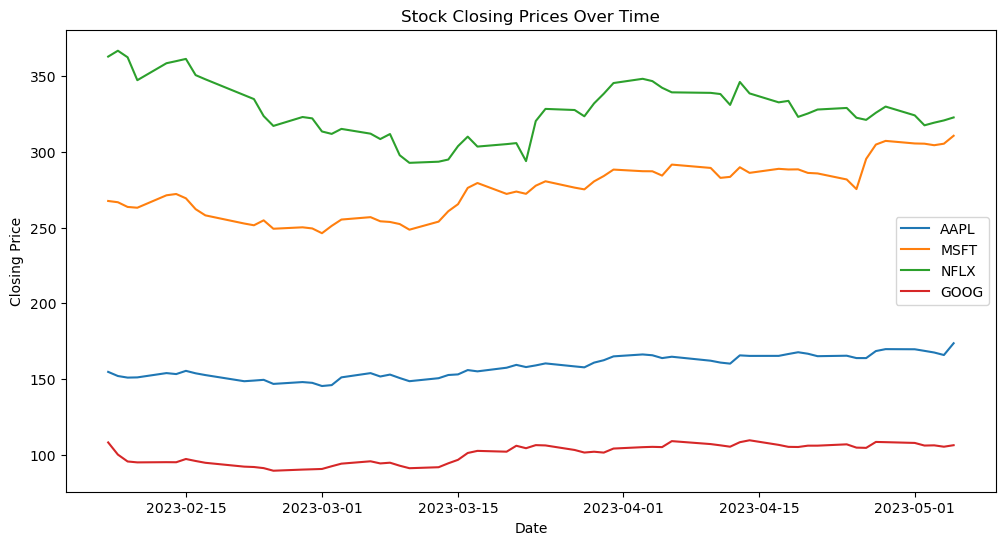

In [6]:
import matplotlib.pyplot as plt  # Ensure Matplotlib is imported

plt.figure(figsize=(12, 6))
for ticker in data['Ticker'].unique():
    subset = data[data['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Close'], label=ticker)

plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Closing Prices Over Time")
plt.legend()
plt.show()


In [7]:
# Calculate daily returns
data['Daily_Return'] = data.groupby('Ticker')['Close'].pct_change()

# 50-day Moving Average
data['50_MA'] = data.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=50).mean())

# Volatility: Standard deviation of daily returns over a 20-day window
data['Volatility'] = data.groupby('Ticker')['Daily_Return'].transform(lambda x: x.rolling(20).std())

# Display the updated dataset
print(data.head())


  Ticker       Date        Open        High         Low       Close  \
0   AAPL 2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL 2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL 2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL 2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL 2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  Daily_Return  50_MA  Volatility  
0  154.414230  83322600           NaN    NaN         NaN  
1  151.688400  64120100     -0.017653    NaN         NaN  
2  150.639999  56007100     -0.006912    NaN         NaN  
3  151.009995  57450700      0.000928    NaN         NaN  
4  153.850006  62199000      0.018807    NaN         NaN  


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting independent features (X) and target variable (y)
data = data.dropna()  # Remove NaN values (important before ML)
X = data[['Open', 'High', 'Low', 'Volume']]  
y = data['Close']  

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for better ML performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score: {r2}")


📊 Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 1.3921290349028639
R-squared Score: 0.9995154386179766


In [10]:
from sklearn.metrics import mean_absolute_error

# Make predictions
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"📊 Linear Regression MAE: {mae}")


📊 Linear Regression MAE: 1.3921290349028639


In [11]:
train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, train_pred)
print(f"Training MAE: {train_mae}")

Training MAE: 1.0273459572386916


In [12]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv=5)
print(f"Cross-Validation MAE: {-cv_scores.mean()}")


Cross-Validation MAE: 1.2747429654161526


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"\n🌲 Random Forest Model Evaluation:")
print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"R-squared Score: {rf_r2}")


🌲 Random Forest Model Evaluation:
Mean Absolute Error (MAE): 3.319759528454561
R-squared Score: 0.9962462533586379


In [14]:
# Make predictions with Random Forest
rf_y_pred = rf_model.predict(X_test)

# Calculate MAE
rf_mae = mean_absolute_error(y_test, rf_y_pred)
print(f"🌲 Random Forest MAE: {rf_mae}")

🌲 Random Forest MAE: 3.319759528454561


In [15]:
pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])

# Create sequences for LSTM
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 3])  # Target is 'Close' price
    return np.array(X), np.array(y)

# Define sequence length
SEQ_LEN = 10
X_lstm, y_lstm = create_sequences(scaled_data, SEQ_LEN)

# Split into training and testing sets (80% Train, 20% Test)
split = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

# Reshape input to fit LSTM (samples, timesteps, features)
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], X_train_lstm.shape[2])
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], X_test_lstm.shape[2])

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Set sequence length
SEQ_LEN = 10  # Define how many past days we use for prediction

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])

# Create sequences for LSTM
def create_sequences(data, seq_length=SEQ_LEN):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 3])  # Target is 'Close' price
    return np.array(X), np.array(y)

# Prepare LSTM dataset
X_lstm, y_lstm = create_sequences(scaled_data)

# Split into training and testing sets
split = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

# Reshape input to fit LSTM (samples, timesteps, features)
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], X_train_lstm.shape[2])
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], X_test_lstm.shape[2])

# Define LSTM Model
model_lstm = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(SEQ_LEN, X_train_lstm.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)  # Output layer for predicting stock price
])

# Compile model
model_lstm.compile(optimizer='adam', loss='mean_absolute_error')

# Train model
history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))


Epoch 1/50


C:\Users\mohan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 422ms/step - loss: 0.6199 - val_loss: 0.0906
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.5196 - val_loss: 0.1252
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.4496 - val_loss: 0.1943
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.3522 - val_loss: 0.2593
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.2600 - val_loss: 0.2977
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2398 - val_loss: 0.3411
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2270 - val_loss: 0.3942
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.2786 - val_loss: 0.4129
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.2978 - val_loss: 0.3788
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2146 - val_loss: 0.3440
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.2290 - val_loss: 0.3353
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.2234 - val_loss: 0.3472
Epoch 13/50

In [18]:
# Make predictions
lstm_y_pred = model_lstm.predict(X_test_lstm)

# Reverse scaling to get original price values
lstm_y_pred = scaler.inverse_transform(np.hstack((X_test_lstm[:, -1, :-1], lstm_y_pred.reshape(-1, 1))))[:, -1]
y_test_lstm_orig = scaler.inverse_transform(np.hstack((X_test_lstm[:, -1, :-1], y_test_lstm.reshape(-1, 1))))[:, -1]

# Calculate MAE for LSTM
from sklearn.metrics import mean_absolute_error
lstm_mae = mean_absolute_error(y_test_lstm_orig, lstm_y_pred)
print(f"\n🔵 LSTM Model Evaluation:")
print(f"Mean Absolute Error (MAE): {lstm_mae}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step

🔵 LSTM Model Evaluation:
Mean Absolute Error (MAE): 41902476.69789348


In [19]:
print(f"\n📌 Model Comparison:")
print(f"Linear Regression MAE: {mae}")
print(f"Random Forest MAE: {rf_mae}")
print(f"LSTM MAE: {lstm_mae}")


📌 Model Comparison:
Linear Regression MAE: 1.3921290349028639
Random Forest MAE: 3.319759528454561
LSTM MAE: 41902476.69789348


In [20]:
print(f"\n📌 Model Comparison (After Fixes):")
print(f"Linear Regression MAE: {mae}")      
print(f"Random Forest MAE: {rf_mae}")      
print(f"LSTM Fixed MAE: {lstm_mae}")       


📌 Model Comparison (After Fixes):
Linear Regression MAE: 1.3921290349028639
Random Forest MAE: 3.319759528454561
LSTM Fixed MAE: 41902476.69789348


In [21]:
import joblib

# Save the trained Linear Regression model
joblib.dump(model, "linear_regression_stock_model.pkl")

# Save the scaler (for feature scaling in future predictions)
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!


In [22]:
import os
print(os.listdir())  # This should show the saved model files

['.ipynb_checkpoints', 'app.py', 'linear_regression_stock_model.pkl', 'predictionOUTPUT.ipynb', 'Project1 stock_marke_analysis&prediction.ipynb', 'scaler.pkl', 'stocks.csv']


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Refit the scaler using only the features used in model training (without 'Close')
scaler = MinMaxScaler()
scaler.fit(data[['Open', 'High', 'Low', 'Volume']])  # Exclude 'Close'

# Save the corrected scaler
import joblib
joblib.dump(scaler, "scaler.pkl")

print("✅ Scaler refitted and saved correctly!")


✅ Scaler refitted and saved correctly!


In [24]:
import pandas as pd
import joblib

# Load the corrected scaler & model
scaler = joblib.load("scaler.pkl")
loaded_model = joblib.load("linear_regression_stock_model.pkl")

# Example new stock data (Without 'Close')
new_data = pd.DataFrame({
    'Open': [160],  
    'High': [165],  
    'Low': [158],  
    'Volume': [4500000]  
})

# Transform new data
scaled_new_data = scaler.transform(new_data)

# Predict closing price
predicted_price = loaded_model.predict(scaled_new_data)

print(f"📈 Predicted Closing Price: {predicted_price[0]}")


📈 Predicted Closing Price: 254.60852130235807


Evaluate Model Performance (Final Check)

In [26]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on test data
y_pred = loaded_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Final Model Performance:")
print(f"✅ Mean Absolute Error (MAE): {mae}")
print(f"✅ R² Score: {r2}")


📊 Final Model Performance:
✅ Mean Absolute Error (MAE): 1.3921290349028639
✅ R² Score: 0.9995154386179766


In [27]:
!pip install flask flask-cors

deploying the model on flask using API

In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import joblib
import numpy as np
import pandas as pd

# Load the trained model & scaler
model = joblib.load("linear_regression_stock_model.pkl")
scaler = joblib.load("scaler.pkl")

# Initialize Flask app
app = Flask(__name__)
CORS(app)  # Enable CORS

@app.route('/predict', methods=['POST'])
def predict():
    try:
        print("📩 Received a request")  # Debugging message

        # Get JSON data from user input
        data = request.get_json()
        print("🔍 Data received:", data)  # Debugging step

        # Required features
        required_features = ['Open', 'High', 'Low', 'Volume']

        # Check if all required features are in the request
        if not all(feature in data for feature in required_features):
            return jsonify({'error': f'Missing features. Required: {required_features}'})

        # Convert input data into DataFrame
        df = pd.DataFrame([data])
        print("📊 Converted DataFrame:\n", df)  # Debugging step

        # Select only required columns
        df = df[required_features]

        # Scale the input features
        scaled_features = scaler.transform(df)
        print("⚙️ Scaled Features:", scaled_features)  # Debugging step

        # Make prediction
        prediction = model.predict(scaled_features)
        print("📈 Prediction:", prediction[0])  # Debugging step

        # Return predicted price
        return jsonify({'Predicted Closing Price': float(prediction[0])})

    except Exception as e:
        print("❌ Error:", str(e))  # Debugging step
        return jsonify({'error': str(e)})

# Run Flask (disable auto-reload in Jupyter)
if __name__ == '__main__':
    app.run(debug=False, use_reloader=False)
@app.route('/predict', methods=['POST'])
def predict():
    try:
        print("📩 Received a request!")  # Debugging message

        # Get JSON data from user input
        data = request.get_json()
        print("🔍 Data received:", data)  # Debugging step

        # Check if data is empty
        if not data:
            return jsonify({'error': 'No data received. Ensure the request has a JSON body.'})

        # Required features
        required_features = ['Open', 'High', 'Low', 'Volume']

        # Check if all required features are present
        if not all(feature in data for feature in required_features):
            return jsonify({'error': f'Missing features. Required: {required_features}'})

        # Convert input data into DataFrame
        df = pd.DataFrame([data])
        print("📊 Converted DataFrame:\n", df)  # Debugging step

        # Scale the input features
        scaled_features = scaler.transform(df)
        print("⚙️ Scaled Features:", scaled_features)  # Debugging step

        # Make prediction
        prediction = model.predict(scaled_features)
        print("📈 Prediction:", prediction[0])  # Debugging step

        # Return predicted price
        return jsonify({'Predicted Closing Price': float(prediction[0])})

    except Exception as e:
        print("❌ Error:", str(e))  # Debugging step
        return jsonify({'error': str(e)})


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [26/Mar/2025 19:18:45] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [26/Mar/2025 19:18:45] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [26/Mar/2025 19:20:07] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [26/Mar/2025 19:25:30] "GET /predict HTTP/1.1" 405 -


In [ ]:
import requests

# Flask API URL
url = "http://127.0.0.1:5000/predict"

# Example stock data (ensure the keys match what the model expects)
new_stock = {
    "Open": 160,
    "High": 165,
    "Low": 158,
    "Volume": 4500000
}

# Send a POST request
response = requests.post(url, json=new_stock)

# Print the API response
print(response.json())  # Should return the predicted closing price


In [ ]:
!netstat -ano | findstr :5000